# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [76]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
"""lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)"""
#1500 seems a bit excessive while we are trying to make it work
lats = np.random.uniform(lat_range[0], lat_range[1], size=300)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=300)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 168


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [77]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?" 
# 
#full_url = base_url + {city name} + "&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities): #enumerate add's list order to list item
    print(city)
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "q="+ city + "&appid=" + weather_api_key
    response = requests.get(city_url).json()

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response["weather"][0]["main"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
port mathurin
Processing Record 1 of Set 1 | port mathurin
arraial do cabo
Processing Record 2 of Set 1 | arraial do cabo
tiszaluc
Processing Record 3 of Set 1 | tiszaluc
klyuchi
Processing Record 4 of Set 1 | klyuchi
blackmans bay
Processing Record 5 of Set 1 | blackmans bay
petropavlovsk-kamchatsky
Processing Record 6 of Set 1 | petropavlovsk-kamchatsky
laojunmiao
Processing Record 7 of Set 1 | laojunmiao
suva
Processing Record 8 of Set 1 | suva
albany
Processing Record 9 of Set 1 | albany
sandnessjoen
Processing Record 10 of Set 1 | sandnessjoen
longyearbyen
Processing Record 11 of Set 1 | longyearbyen
georgetown
Processing Record 12 of Set 1 | georgetown
adamstown
Processing Record 13 of Set 1 | adamstown
gadzhiyevo
Processing Record 14 of Set 1 | gadzhiyevo
chibougamau
Processing Record 15 of Set 1 | chibougamau
puerto baquerizo moreno
Processing Record 16 of Set 1 | puerto baquerizo moreno
grytviken
Processing Record 17 

starobaltachevo
Processing Record 4 of Set 4 | starobaltachevo
flying fish cove
Processing Record 5 of Set 4 | flying fish cove
kingscliff
Processing Record 6 of Set 4 | kingscliff
watertown
Processing Record 7 of Set 4 | watertown
qaqortoq
Processing Record 8 of Set 4 | qaqortoq
al kharijah
Processing Record 9 of Set 4 | al kharijah
toliara
Processing Record 10 of Set 4 | toliara
qujing
Processing Record 11 of Set 4 | qujing
la passe
Processing Record 12 of Set 4 | la passe
ribeira grande
Processing Record 13 of Set 4 | ribeira grande
bahir dar
Processing Record 14 of Set 4 | bahir dar
duyun
Processing Record 15 of Set 4 | duyun
lanzhou
Processing Record 16 of Set 4 | lanzhou
berezovyy
Processing Record 17 of Set 4 | berezovyy
-----------------------------
Data Retrieval Complete      
-----------------------------


city_url = base_url + "q="+ "houston" + "&appid=" + weather_api_key
response = requests.get(city_url).json()
response

data gathering

response["weather"][0]["main"]
response["coord"]["lon"]
response["wind"]["speed"]
response["sys"]["country"]
response["dt"]

In [78]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          164
Lat           164
Lng           164
Max Temp      164
Humidity      164
Cloudiness    164
Wind Speed    164
Country       164
Date          164
dtype: int64

In [79]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,300.17,87,100,6.61,MU,1738510861
1,arraial do cabo,-22.9661,-42.0278,307.13,46,20,7.20,BR,1738510862
2,tiszaluc,48.0333,21.0833,276.94,87,100,1.07,HU,1738510864
3,klyuchi,52.2667,79.1667,254.82,100,89,2.14,RU,1738510865
4,blackmans bay,-43.0167,147.3167,292.22,86,81,1.84,AU,1738510866


In [80]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [81]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,300.17,87,100,6.61,MU,1738510861
1,arraial do cabo,-22.9661,-42.0278,307.13,46,20,7.20,BR,1738510862
2,tiszaluc,48.0333,21.0833,276.94,87,100,1.07,HU,1738510864
3,klyuchi,52.2667,79.1667,254.82,100,89,2.14,RU,1738510865
4,blackmans bay,-43.0167,147.3167,292.22,86,81,1.84,AU,1738510866


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

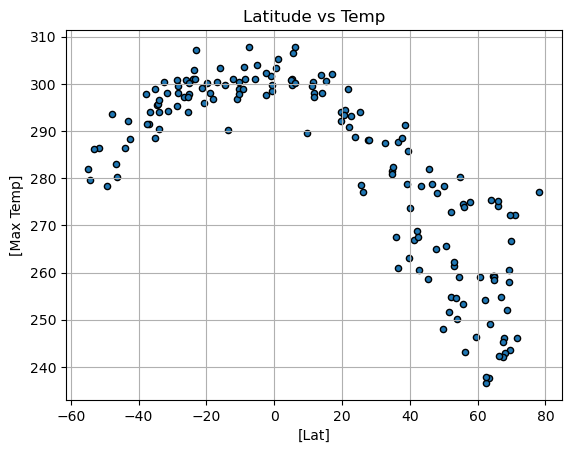

In [82]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = ["Lat"], y = ["Max Temp"],
                         marker = "o", edgecolors= "black",)

# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Temp")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

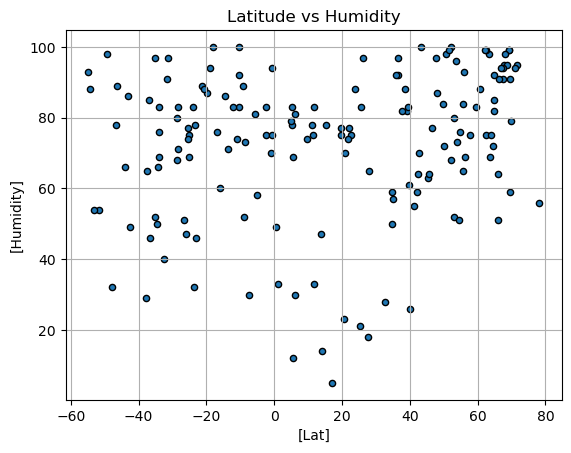

In [83]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = ["Lat"], y = ["Humidity"],
                         marker = "o", edgecolors= "black")

# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Humidity")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

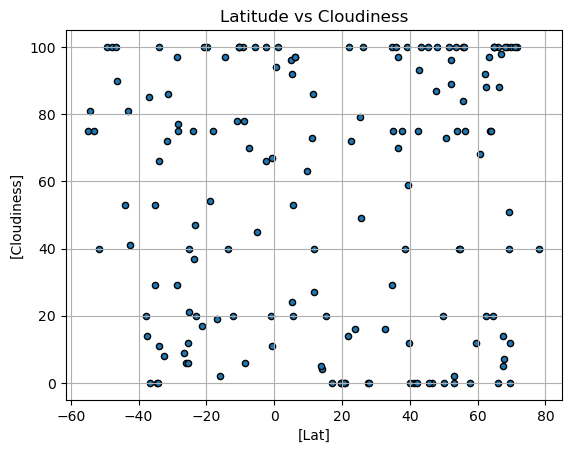

In [84]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = ["Lat"], y = ["Cloudiness"],
                         marker = "o", edgecolors= "black")

# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Cloudiness")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

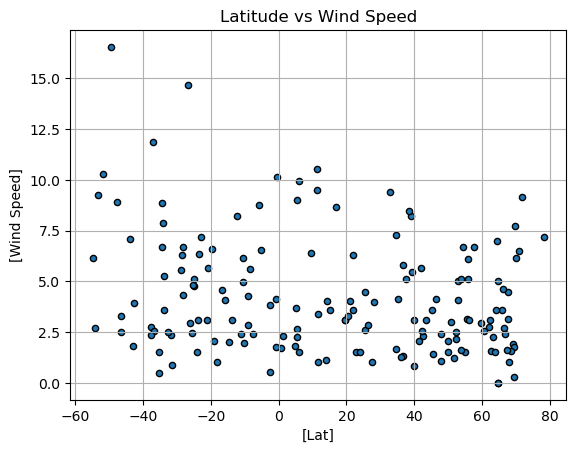

In [85]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = ["Lat"], y = ["Wind Speed"],
                         marker = "o", edgecolors= "black")


# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Wind Speed")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [86]:
# Define a function to create Linear Regression plots
# Largely repurposed code from module 5 challenge 
def linreg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    plt.plot(x, regress_values, "r-", label=f"y={slope:.2f}x+{intercept:.2f}")
    plt.text( np.mean(x),np.mean(y), f"y = {slope:.2f}x + {intercept:.2f}", fontsize=12, color="red")
    print(f"The r^2 value is {rvalue**2}") #r^2
    

    

### Example of function

city_data_df.plot.scatter(x = ["Lat"], y = ["Wind Speed"],
                         marker = "o", edgecolors= "black")
linreg(city_data_df["Lat"],city_data_df["Wind Speed"])

plt.grid()
plt.title("Latitude vs Wind Speed")

plt.savefig("output_data/Fig1.png")

plt.show()

In [87]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[city_data_df["Lat"]>= 0]

# Display sample data 
northern_hemi_df["Lat"].min() #ensureing proper df creation
northern_hemi_df.shape
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,tiszaluc,48.0333,21.0833,276.94,87,100,1.07,HU,1738510864
3,klyuchi,52.2667,79.1667,254.82,100,89,2.14,RU,1738510865
5,petropavlovsk-kamchatsky,53.0452,158.6483,261.48,52,0,5.00,RU,1738510596
6,laojunmiao,39.8333,97.7333,263.14,61,12,0.81,CN,1738510868
8,albany,42.6001,-73.9662,260.62,70,93,2.29,US,1738510871


In [88]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df["Lat"].max() #ensureing proper df creation
southern_hemi_df.shape
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,300.17,87,100,6.61,MU,1738510861
1,arraial do cabo,-22.9661,-42.0278,307.13,46,20,7.20,BR,1738510862
4,blackmans bay,-43.0167,147.3167,292.22,86,81,1.84,AU,1738510866
7,suva,-18.1416,178.4415,296.86,100,75,1.03,FJ,1738510870
12,adamstown,-25.0660,-130.1015,297.86,75,21,4.77,PN,1738510876


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is 0.7268831459179623


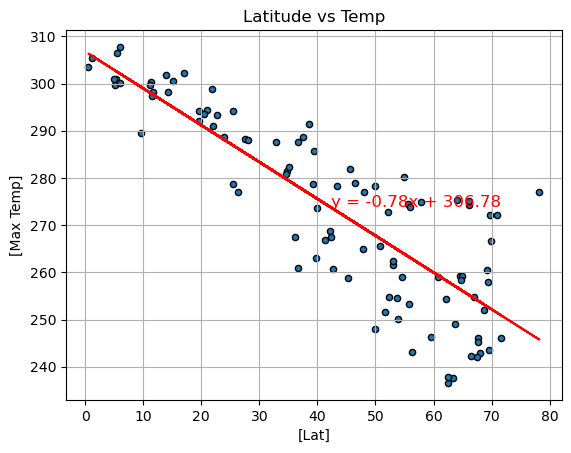

In [89]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot.scatter(x = ["Lat"], y = ["Max Temp"],
                         marker = "o", edgecolors= "black",)
linreg(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Temp")

# Save the figure
plt.savefig("output_data/Fig1_n.png")

# Show plot
plt.show()

The r^2 value is 0.5819910595778873


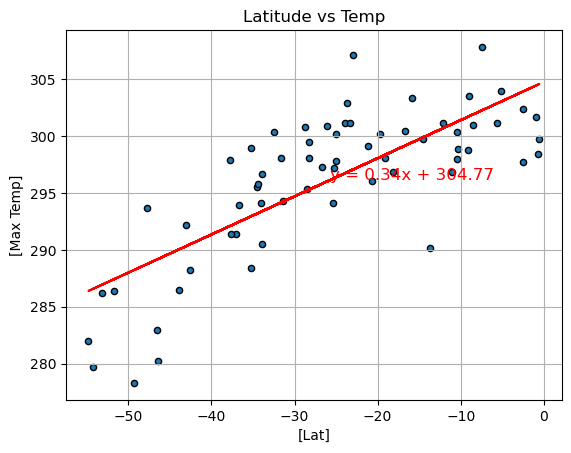

In [90]:
# Linear regression on southern Hemisphere
southern_hemi_df.plot.scatter(x = ["Lat"], y = ["Max Temp"],
                         marker = "o", edgecolors= "black",)
linreg(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Temp")

# Save the figure
plt.savefig("output_data/Fig1_s.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** An important note, which will hold true for the rest of the analysis, is that laitiude decreases as it approaches the equator from the northern hemisphere, and increases as it approaches from the southern. Thus, both of the graphs show temperature increasing as both halfs of the globe apprach the equator

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is 0.2024011287146237


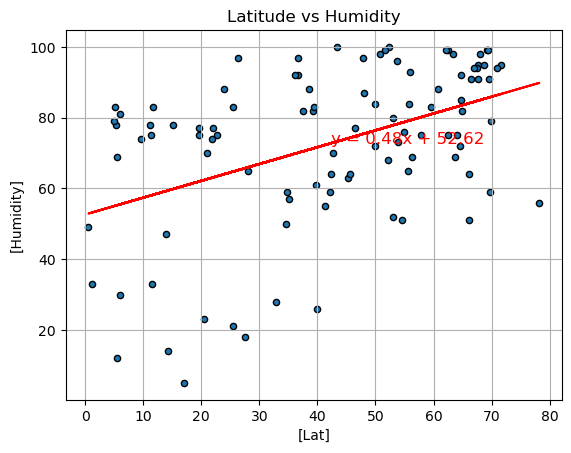

In [91]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot.scatter(x = ["Lat"], y = ["Humidity"],
                         marker = "o", edgecolors= "black")
linreg(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Humidity")

# Save the figure
plt.savefig("output_data/Fig2_n.png")

# Show plot
plt.show()

The r^2 value is 0.018221455475288077


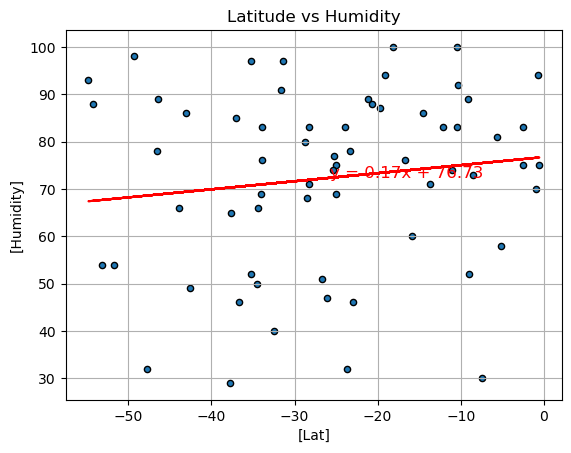

In [92]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot.scatter(x = ["Lat"], y = ["Humidity"],
                         marker = "o", edgecolors= "black")
linreg(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Humidity")

# Save the figure
plt.savefig("output_data/Fig2_s.png")

# Show plot
plt.show()

Interestingly, according to the graphs, there is a farily distinct positive correlation between latitude and humidity in the northern hemishphere, although I conjecture this is a symptom of using too small a dataset (my computer struggles with more than 300 items generated). The southern hemisphere also sees a positive correlation with humidity, although significantly less corellated

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is 0.011215814050185242


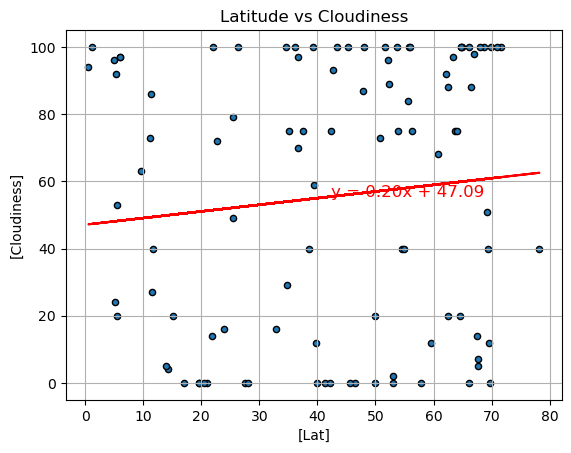

In [93]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot.scatter(x = ["Lat"], y = ["Cloudiness"],
                         marker = "o", edgecolors= "black")
linreg(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3_n.png")

# Show plot
plt.show()

The r^2 value is 0.0002911531335025303


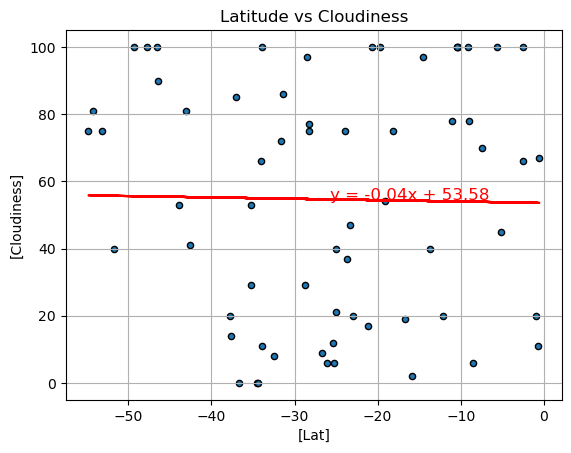

In [94]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot.scatter(x = ["Lat"], y = ["Cloudiness"],
                         marker = "o", edgecolors= "black")
linreg(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3_s.png")

# Show plot
plt.show()

From the graphs displayed, in the northern hemisphere, cloudiness decreases slightly as the equator is approached. In the southern hemisphere, cloudiness tends not to change as the equator is approached 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is 0.011987518368725322


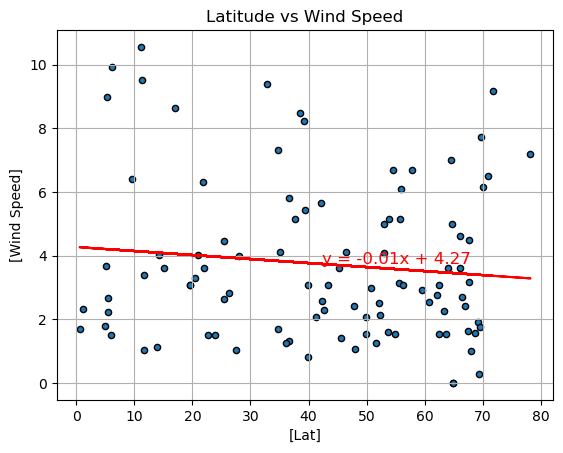

In [95]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot.scatter(x = ["Lat"], y = ["Wind Speed"],
                         marker = "o", edgecolors= "black")
linreg(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4_n.png")

# Show plot
plt.show()

The r^2 value is 0.04157989273071033


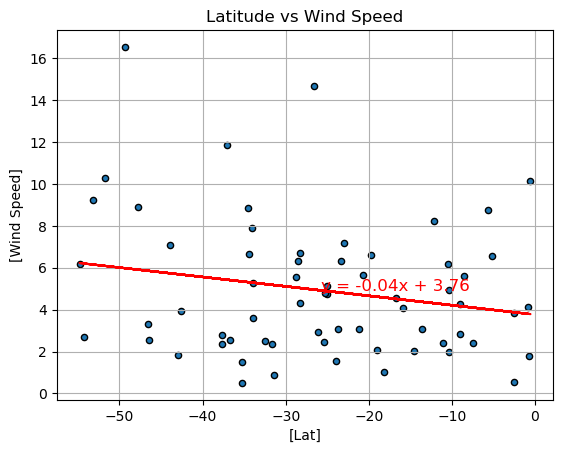

In [96]:
# Linear regression on Northern Hemisphere
southern_hemi_df.plot.scatter(x = ["Lat"], y = ["Wind Speed"],
                         marker = "o", edgecolors= "black")
linreg(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
# Incorporate the other graph properties
plt.grid()
plt.title("Latitude vs Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4_s.png")

# Show plot
plt.show()

In the northern hemisphere, wind speed tends to increase slightly as the equator is approached. In the southern hemisphere, wind speed tends to decrease slightly as the equator is approched